# **Final Project: Electronic sales**

The dataset contains 20,000 records of electronic sales from September 2023 to September 2024.It includes 16 attributes related to customer purchases, demographics, product details, pricing and order fulfillment.

Key Attributes:

*    Customer ID: Unique identifier for customers.
*    Age: Age of the customer.
*    Gender: Gender of the customer.
*   Loyalty Member: Indicates whether the customer is a member.
*   Product Type: Category of electronic items purchased.
*    SKU: Unique product identifier.
*    Rating: Customer rating of the product.
*    Order Status: Order completion status.
*    Payment Method: Payment type used.
*    Total Price: Final transaction amount.
*    Unit Price: Price per item.
*    Quantity: Number of items purchased.
*    Purchase Date: Date of the transaction.
*    Shipping Type: Delivery method.
*    Add-ons Purchased: Additional items bought.
*    Add-on Total: Cost of add-ons.




In [27]:
import pandas as pd

In [28]:
df = pd.read_csv('/content/Electronic_sales_Sep2023-Sep2024.csv')
df.head()

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer ID        20000 non-null  int64  
 1   Age                20000 non-null  int64  
 2   Gender             19999 non-null  object 
 3   Loyalty Member     20000 non-null  object 
 4   Product Type       20000 non-null  object 
 5   SKU                20000 non-null  object 
 6   Rating             20000 non-null  int64  
 7   Order Status       20000 non-null  object 
 8   Payment Method     20000 non-null  object 
 9   Total Price        20000 non-null  float64
 10  Unit Price         20000 non-null  float64
 11  Quantity           20000 non-null  int64  
 12  Purchase Date      20000 non-null  object 
 13  Shipping Type      20000 non-null  object 
 14  Add-ons Purchased  15132 non-null  object 
 15  Add-on Total       20000 non-null  float64
dtypes: float64(3), int64(4

## Let's clean the data

Convert 'Purchase Date' column to datetime format

In [30]:
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])

Convert 'Loyalty Member' to numeric

In [ ]:
df_['Loyalty Member'] = df['Loyalty Member'].map({'No': 0, 'Yes': 1})

Drop unessary columns

In [31]:
df.drop(columns=['Add-ons Purchased', 'Add-on Total'], inplace=True)
df.head()

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express


Handle missing values

In [32]:
df.isnull().sum()

,0
Customer ID,0
Age,0
Gender,1
Loyalty Member,0
Product Type,0
SKU,0
Rating,0
Order Status,0
Payment Method,0
Total Price,0


Fill missing Gender with mode

In [55]:
df = df.assign(Gender=df['Gender'].fillna(df['Gender'].mode()[0]))

In [56]:
df.isnull().sum()

,0
Customer ID,0
Age,0
Gender,0
Loyalty Member,0
Product Type,0
SKU,0
Rating,0
Order Status,0
Payment Method,0
Total Price,0


Check the unique values of 'Payment Method'

In [57]:
print(df['Payment Method'].unique())

['Credit Card' 'Paypal' 'Cash' 'Debit Card' 'Bank Transfer' 'PayPal']


clean the variantions

In [58]:
df['Payment Method'] = df['Payment Method'].replace({'Paypal': 'PayPal'})

get a copy of the dataset

In [59]:
df_clean = df.copy()

## Key insights from EDA

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

Sales trend over time

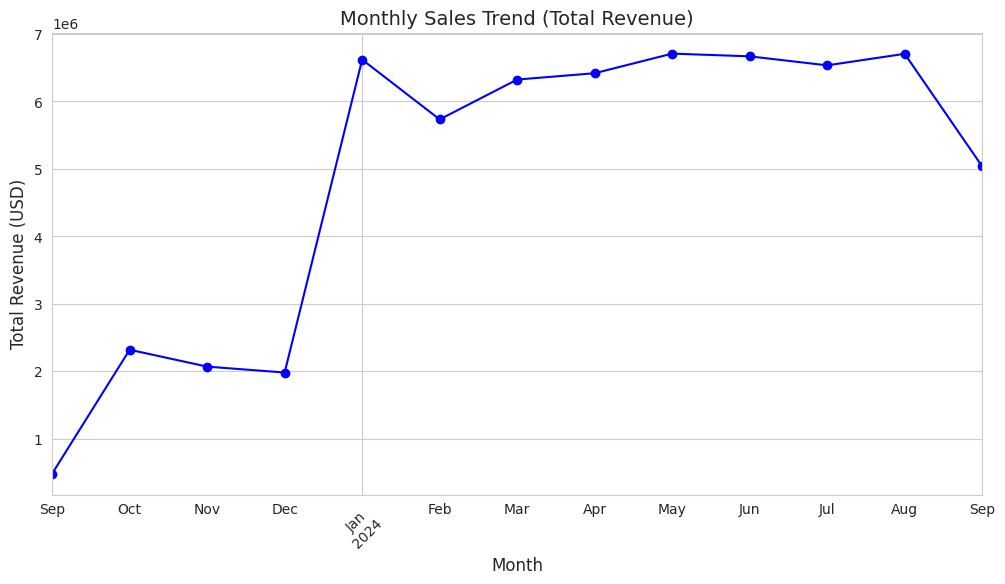

In [61]:
plt.figure(figsize=(12, 6))
df.resample('ME', on='Purchase Date')['Total Price'].sum().plot(marker='o', color='b')
plt.title("Monthly Sales Trend (Total Revenue)", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Revenue (USD)", fontsize=12)
plt.xticks(rotation=45)
plt.show()

Customer spending

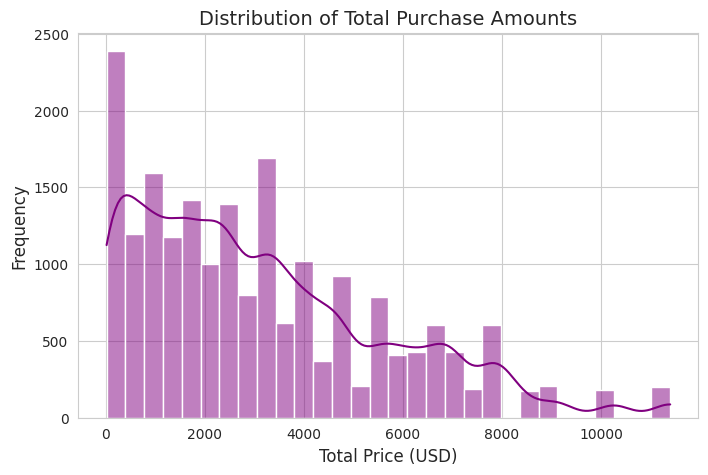

In [62]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Total Price'], bins=30, kde=True, color='purple')
plt.title("Distribution of Total Purchase Amounts", fontsize=14)
plt.xlabel("Total Price (USD)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

Average rating per product type

<ipython-input-63-565c4041346f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df_clean, x='Product Type', y='Rating', errorbar=None, palette="coolwarm",


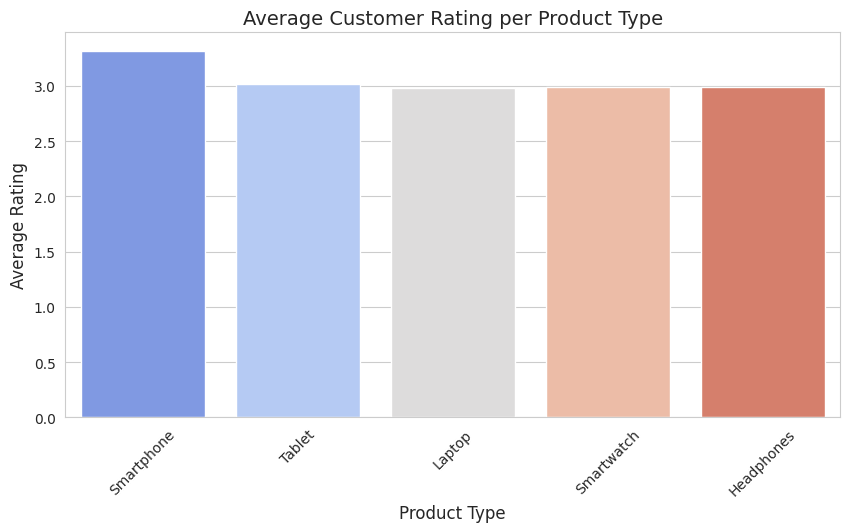

In [63]:
plt.figure(figsize=(10, 5))
sns.barplot(data = df_clean, x='Product Type', y='Rating', errorbar=None, palette="coolwarm",
    legend=False ) # Changed 'data_clean' to 'data'
plt.title("Average Customer Rating per Product Type", fontsize=14)
plt.xlabel("Product Type", fontsize=12)
plt.ylabel("Average Rating", fontsize=12)
plt.xticks(rotation=45)
plt.show()

Payment method usage

<ipython-input-64-9c805e6ae5e4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, x='Payment Method', palette='Set2')


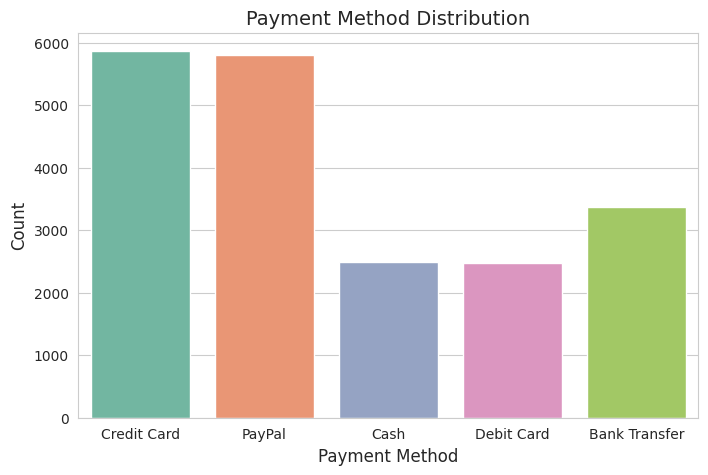

In [64]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_clean, x='Payment Method', palette='Set2')
plt.title("Payment Method Distribution", fontsize=14)
plt.xlabel("Payment Method", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

## Hypothesis testing

In [65]:
from scipy.stats import ttest_ind

Loyalty members spend more than non-members

In [66]:
#Split data into members and non members
members = df[df['Loyalty Member'] == 'Yes']['Total Price']
non_members = df[df['Loyalty Member'] == 'No']['Total Price']

# Perform an independent t-test
t_stat, p_value = ttest_ind(members, non_members, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Loyalty members spend significantly more.")
else:
    print("Fail to reject the null hypothesis: No significant difference in spending.")

T-statistic: -1.2620
P-value: 0.2070
Fail to reject the null hypothesis: No significant difference in spending.


Higher-priced items receive lower customer ratings.

In [67]:
# Split the data into high and low price groups
high_price_items = df_clean[df_clean['Unit Price'] > df_clean['Unit Price'].median()]['Rating']
low_price_items = df_clean[df_clean['Unit Price'] <= df_clean['Unit Price'].median()]['Rating']

t_stat, p_value = ttest_ind(high_price_items, low_price_items, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in ratings between high and low priced items.")
else:
    print("Fail to reject the null hypothesis: No significant difference in ratings between high and low priced items.")


T-statistic: -35.3817
P-value: 0.0000
Reject the null hypothesis: There is a significant difference in ratings between high and low priced items.


Express shipping leads to higher customer satisfaction (ratings)

In [68]:
# Split the data into express and other shipping groups
express_shipping = df_clean[df_clean['Shipping Type'] == 'Express']['Rating']
other_shipping = df_clean[df_clean['Shipping Type'] != 'Express']['Rating']

t_stat, p_value = ttest_ind(express_shipping, other_shipping, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Express shipping leads to significantly higher customer satisfaction.")
else:
    print("Fail to reject the null hypothesis: No significant difference in customer satisfaction between express and other shipping types.")


T-statistic: 6.4400
P-value: 0.0000
Reject the null hypothesis: Express shipping leads to significantly higher customer satisfaction.


## Customer Segmentation

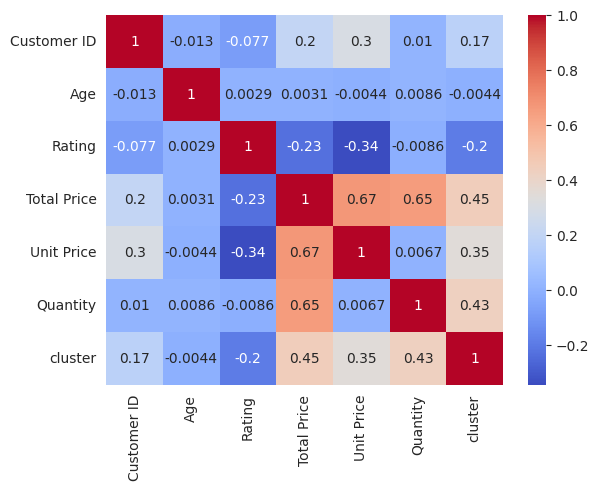

In [69]:
from sklearn.cluster import KMeans

# Feature selection
features = ['Total Price', 'Quantity', 'Age']
X = df_clean[features]

# Apply k-means clustering
kmeans = KMeans(n_clusters=3, random_state=0)
df_clean['cluster'] = kmeans.fit_predict(X)

# Calculate correlation matrix only for numeric columns
correlation_matrix = df_clean.select_dtypes(include=['number']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

## Summary

The dataset provides valuable insights into electronic sales trends and customer behavior. While the data is generally clean and usable, there are areas for potential improvement. For instance, the dataset contains missing values in the 'Gender' column which were addressed by imputing with the mode. Additionally variations in payment method labels were standardized for consistency. To further enhance the analysis by collecting additional data such as customer location, income levels and purchase frequency, could provide a more comprehensive view of customer demographics and preferences and leading to more robust segmentation and marketing strategies